In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('collegiate_athlete_injury_dataset (1).csv')

In [5]:
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [11]:
df.isna().sum()

Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
dtype: int64

In [15]:
df.duplicated().sum()

0

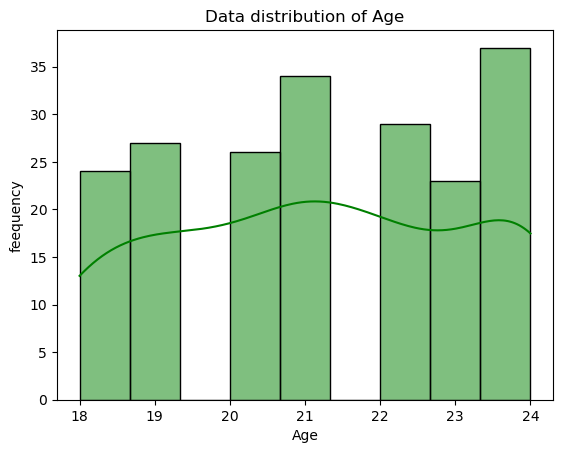

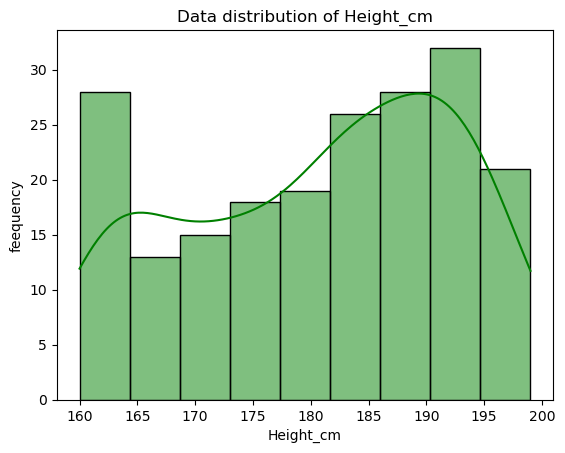

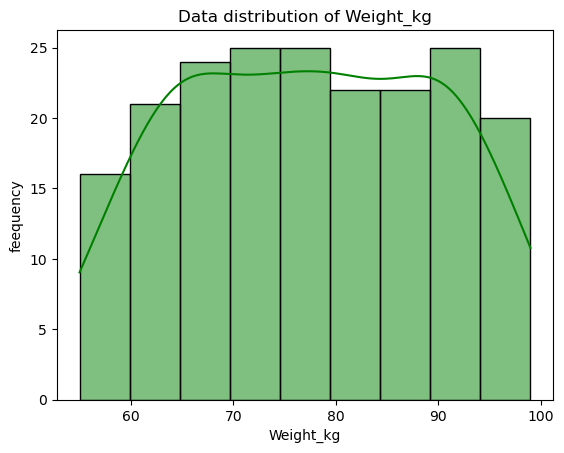

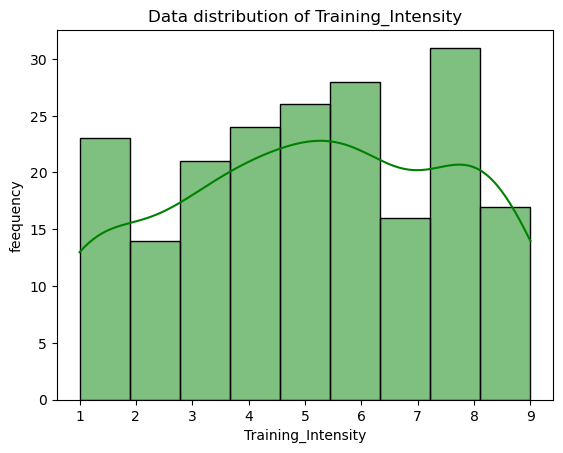

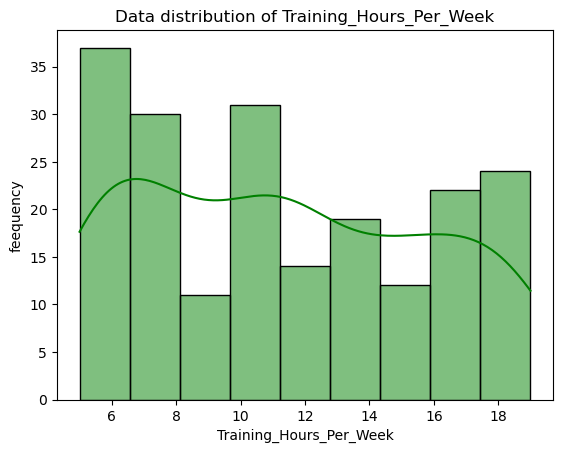

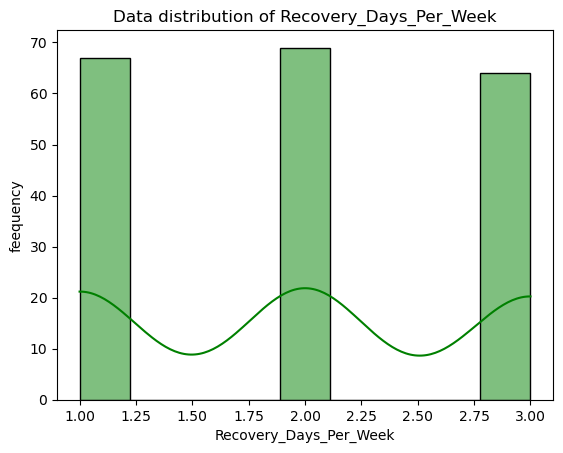

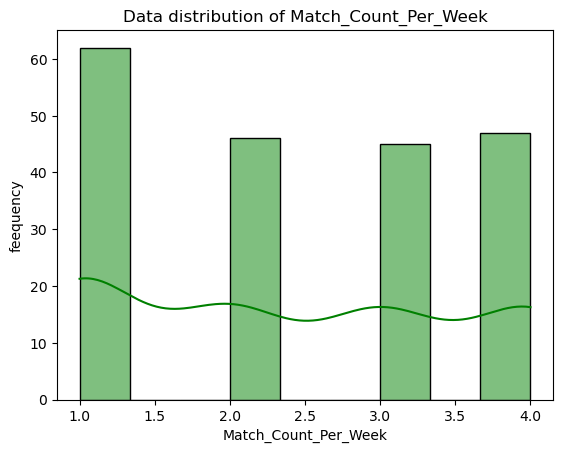

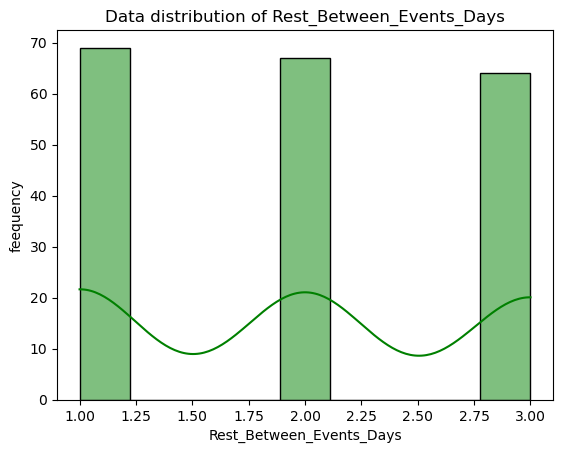

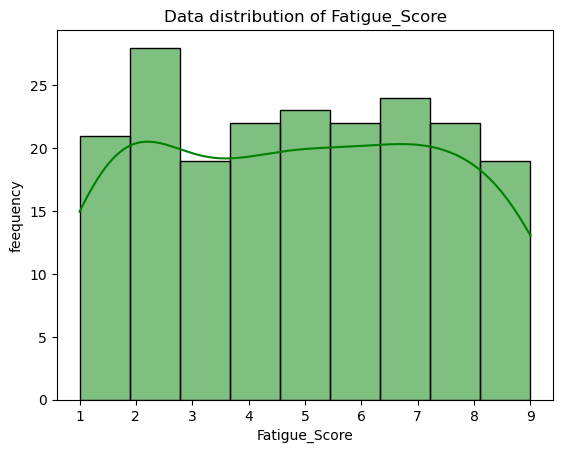

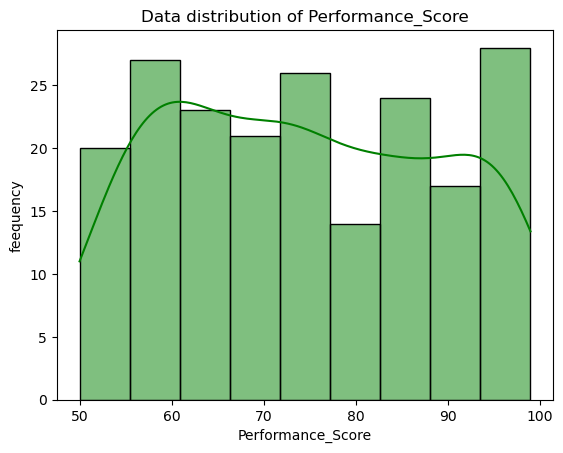

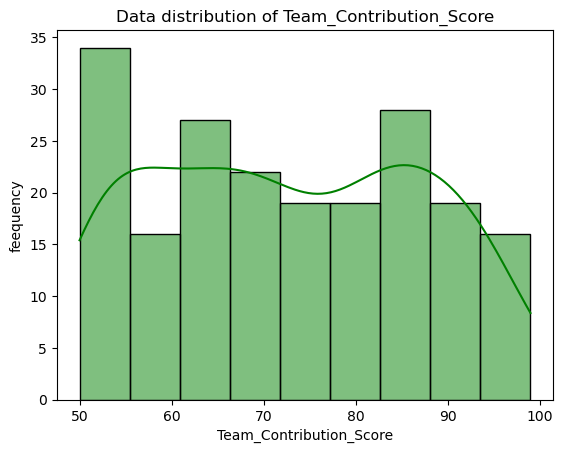

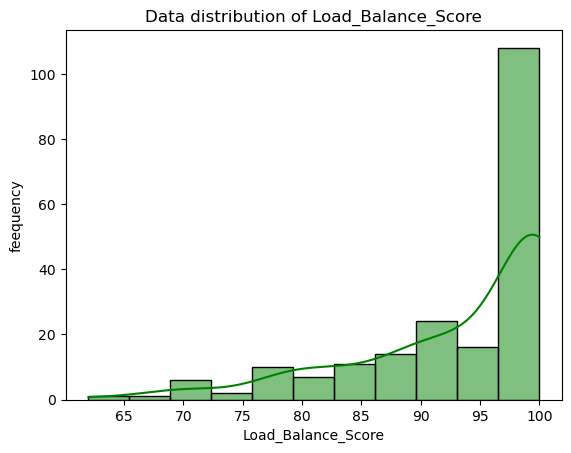

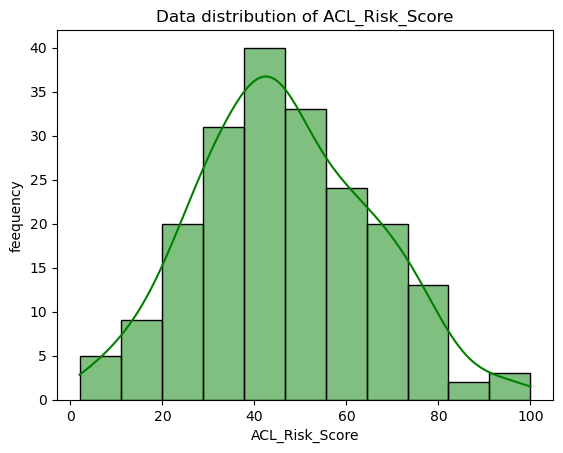

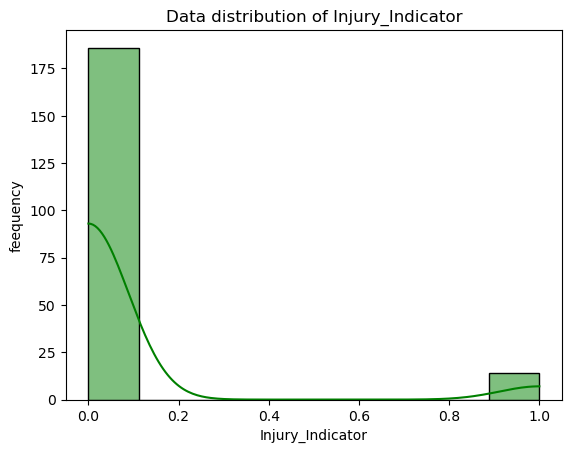

In [42]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.histplot(df[col],kde=True,color='green')
    plt.title(f'Data distribution of {col}')
    plt.ylabel('feequency')
    plt.xlabel(col)
    plt.show()

<Axes: >

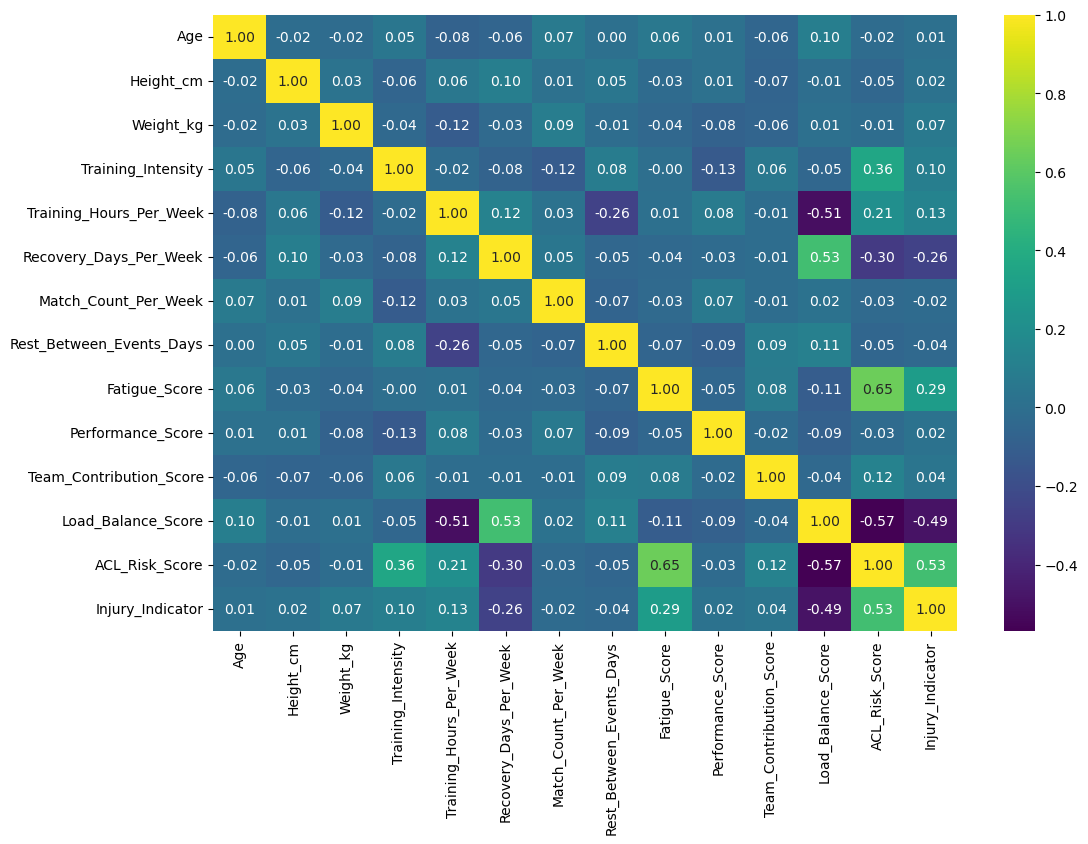

In [46]:
numeric_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,fmt='.2f',cmap='viridis')

[Text(0, 0, '28'), Text(0, 0, '38'), Text(0, 0, '27')]

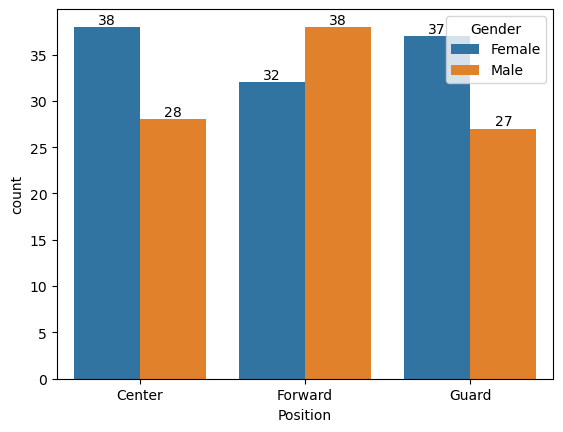

In [52]:
ax=sns.countplot(x=df.Position,hue=df.Gender)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

[Text(0, 0, '87'), Text(0, 0, '6')]

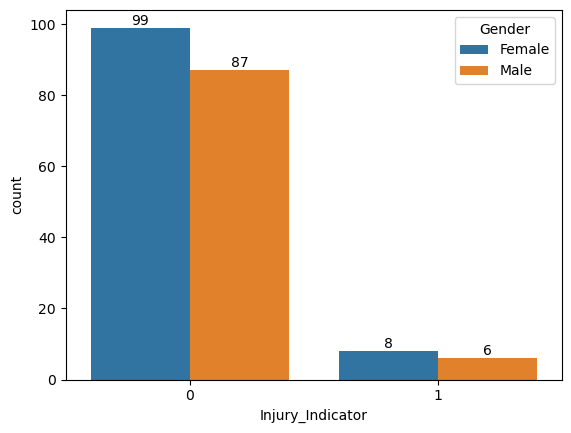

In [54]:
ax=sns.countplot(x=df.Injury_Indicator,hue=df.Gender)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

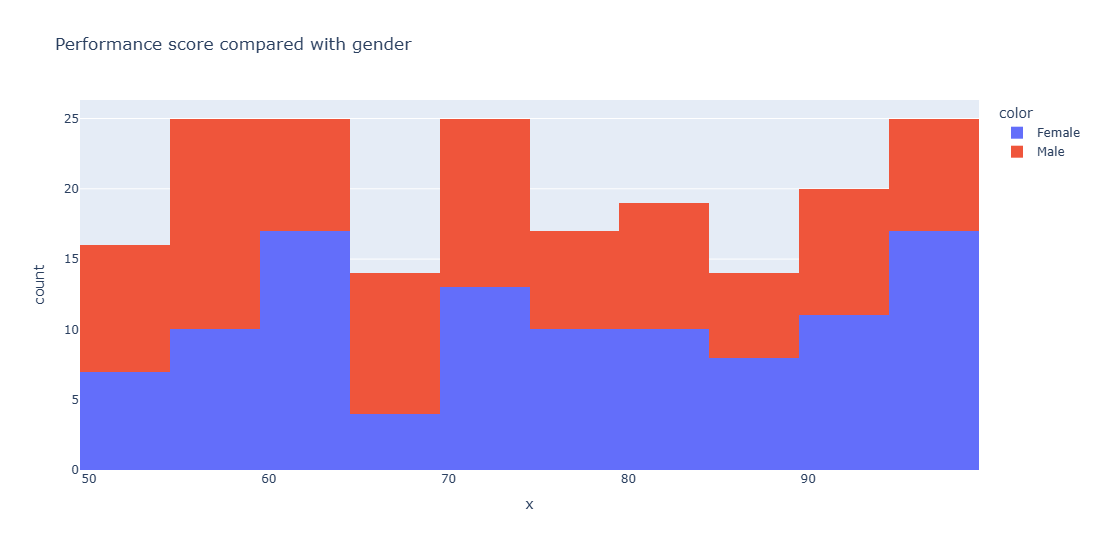

In [72]:
fig=px.histogram(x=df.Performance_Score,color=df.Gender,title='Performance score compared with gender')
fig.update_layout(width=1000,height=550)
fig.show()

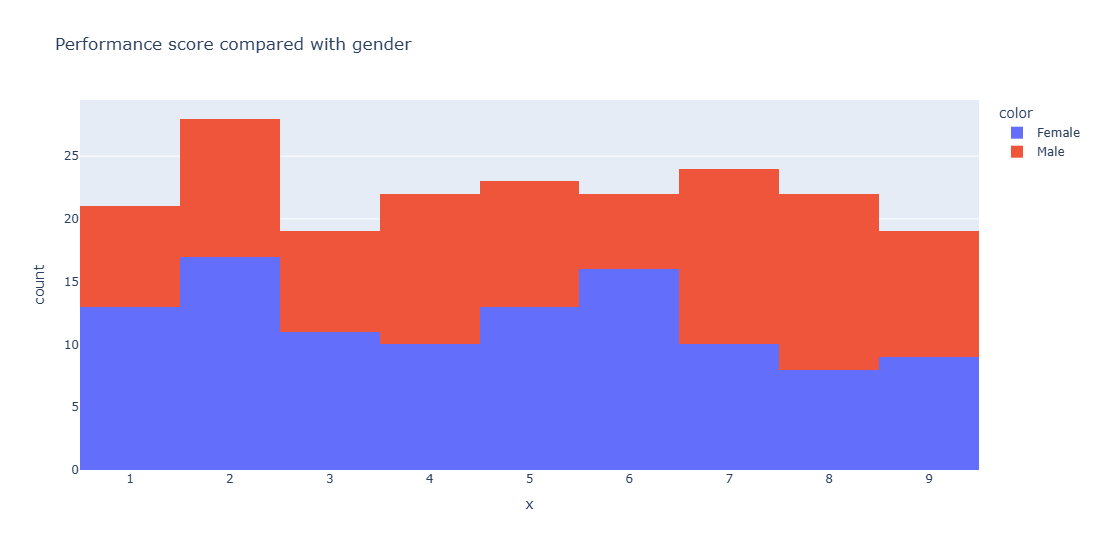

In [74]:
fig=px.histogram(x=df.Fatigue_Score,color=df.Gender,title='Fatigue score compared with gender')
fig.update_layout(width=1000,height=550)
fig.show()

In [92]:
a=df.groupby('Training_Hours_Per_Week').agg({"Performance_Score":'mean'}).reset_index()

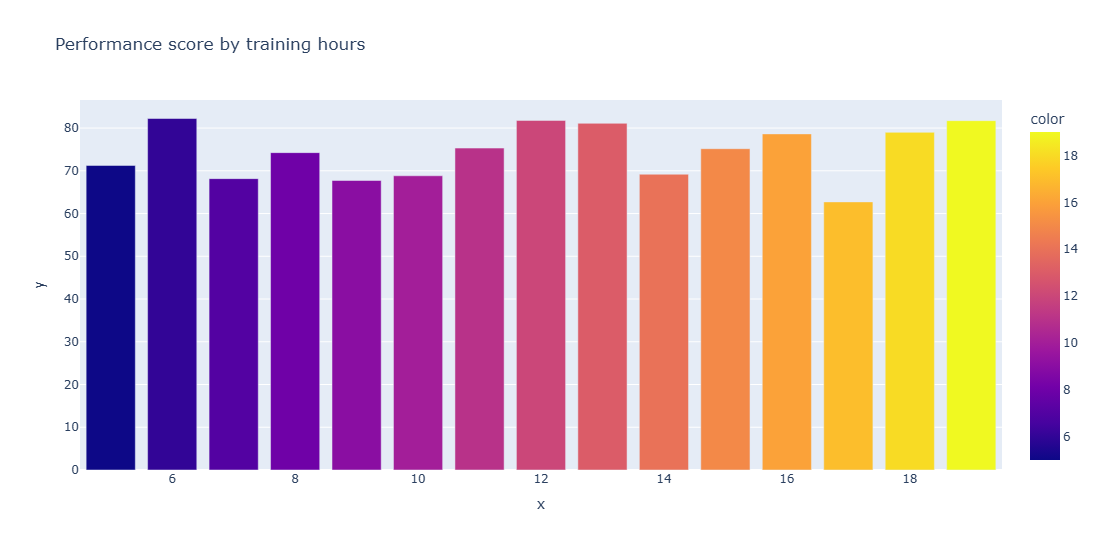

In [94]:
fig=px.bar(x=a.Training_Hours_Per_Week,y=a.Performance_Score,color=a.Training_Hours_Per_Week,title='Performance score by training hours')
fig.update_layout(width=1000,height=550)
fig.show()

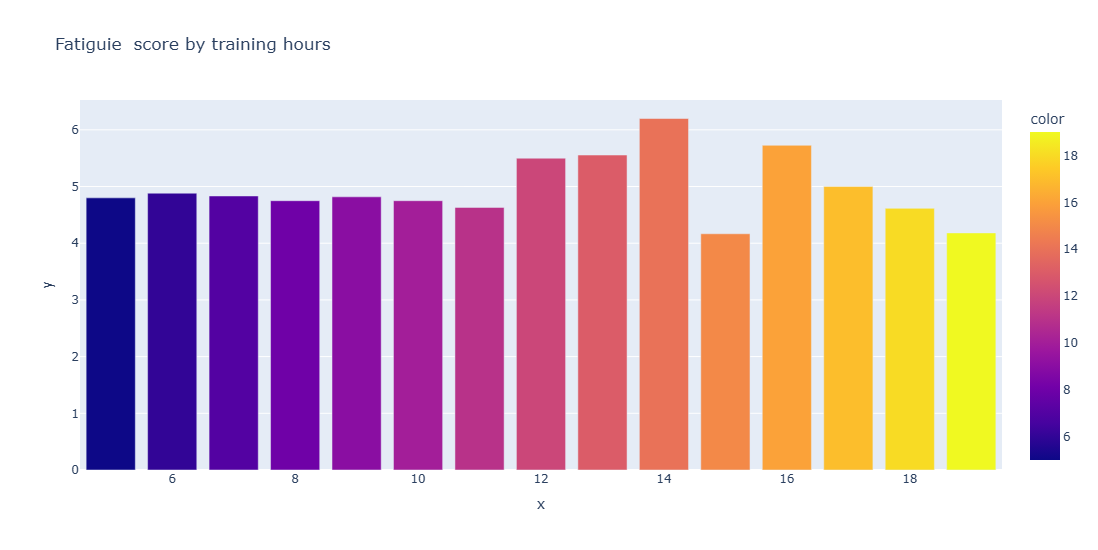

In [98]:
b=df.groupby('Training_Hours_Per_Week').agg({"Fatigue_Score":'mean'}).reset_index()
fig=px.bar(x=b.Training_Hours_Per_Week,y=b.Fatigue_Score,color=b.Training_Hours_Per_Week,title='Fatiguie  score by training hours')
fig.update_layout(width=1000,height=550)
fig.show()

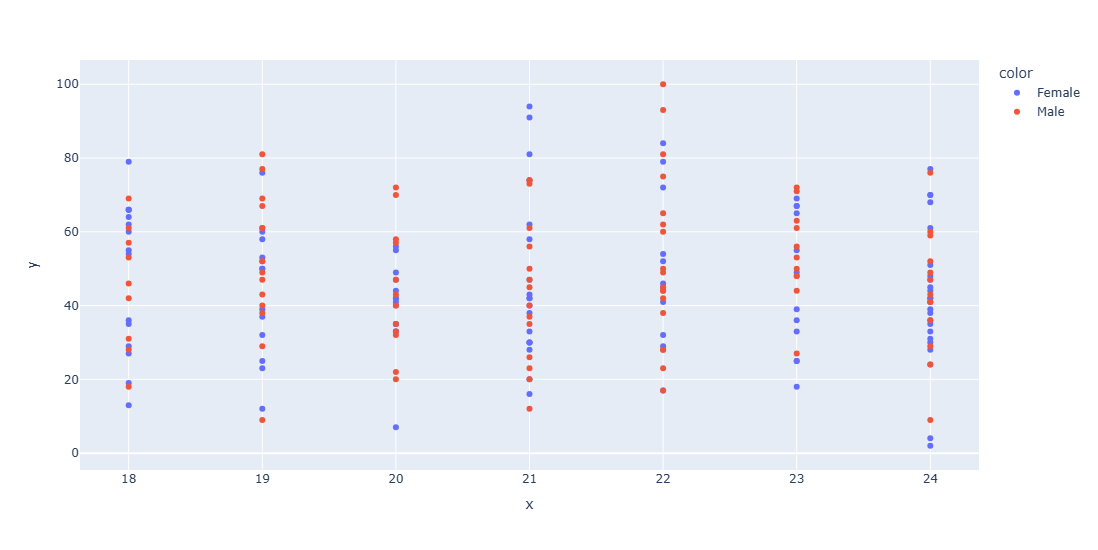

In [108]:
fig=px.scatter(x=df.Age,y=df.ACL_Risk_Score,color=df.Gender)
fig.update_layout(width=1000,height=550)
fig.show()

In [122]:
c=df.groupby('Weight_kg').agg({"Performance_Score":"mean"}).reset_index()

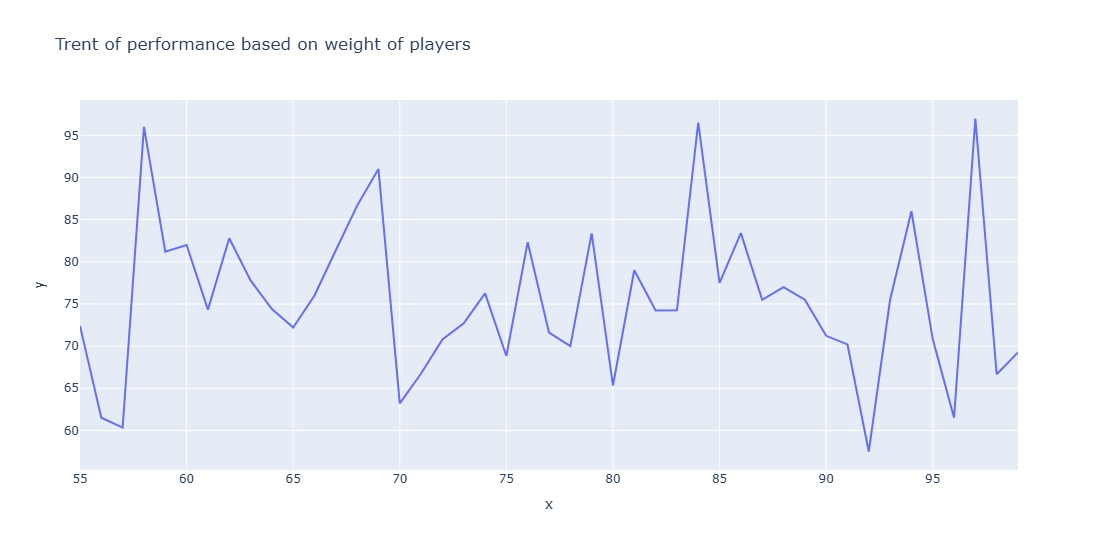

In [140]:
fig=px.line(x=c.Weight_kg,y=c.Performance_Score,title='Trent of performance based on weight of players')
fig.update_layout(width=1000,height=550)
fig.show()